In [165]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np
import xarray as xr
import imageio
import os
from matplotlib.colors import Normalize, LogNorm


In [166]:
def plot_tmmx(day,ax,colourmap,norm=None):
  # Open the NetCDF file
    file_path = '../../data/tmmx.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)

    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'
    dataset = xr.open_dataset('../../data/tmmx.nc')
    # print(f"Min: {(dataset.air_temperature.min() - 273.15).values:.2f}°C, Max: {(dataset.air_temperature.max() - 273.15).values:.2f}°C")
    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    # #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
    if norm is None:
        norm = Normalize(vmin=-10, vmax=55)
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    vmin = -10
    vmax = 55
    # Create color map using pcolormesh
    if(norm is None):
      mesh = m.pcolormesh(x, y, t_max_slice, cmap=colourmap, shading='auto', vmin=vmin, vmax=vmax, ax=ax)
    else:
      mesh = m.pcolormesh(x, y, t_max_slice, cmap=colourmap, shading='auto', norm=norm, ax=ax)

    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Temperature (°C)')

    # Add title
    ax.set_title('Maximum Near-Surface Air Temperature over the USA - day '+ str(day) +' '+colourmap)

    # Show the plot
    # plt.show()

    # Close the dataset
    dataset.close()
   

In [167]:
def plot_tmmn(day,ax):
  # Open the NetCDF file
    file_path = '../../data/tmmn.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)

    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'

    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    # #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Temperature (°C)')

    # Add title
    ax.set_title('Maximum Near-Surface Air Temperature over the USA - '+"day "+ day)

    # Show the plot
    # plt.show()

    # Close the dataset
    dataset.close()

In [168]:
def plot_srad(day,ax):
  # Open the NetCDF file
    file_path = '../../data/srad.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'surface_downwelling_shortwave_flux_in_air'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('SRAD')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [169]:
def plot_bi(day,ax):
  # Open the NetCDF file
    file_path = '../../data/bi.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'burning_index_g'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('BI')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [170]:
def plot_erc(day,ax):
  # Open the NetCDF file
    file_path = '../../data/erc.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'energy_release_component-g'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('ERC')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [171]:
def plot_fm100(day,ax):
  # Open the NetCDF file
    file_path = '../../data/fm100.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'dead_fuel_moisture_100hr'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('FM100')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [172]:
def plot_fm1000(day,ax):
  # Open the NetCDF file
    file_path = '../../data/fm1000.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    req_thing = 'dead_fuel_moisture_1000hr'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_slice= t_max[day, :, :]  # Select the first time step

    # Ensure latitudes and longitudes are 1D arrays and precipitation_slice is 2D
    # print('Latitudes shape:', latitudes.shape)
    # print('Longitudes shape:', longitudes.shape)
    # print('Temperature slice shape:', t_max_slice.shape)
    
    # Create a Basemap instance
    #plt.figure(figsize=(4, 4))
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)

    # Draw coastlines and countries
    m.drawcoastlines()
    m.drawcountries()

    # Convert lat/lon to map projection coordinates
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
        
        # Convert lat/lon to map projection coordinates
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    # Create color map using pcolormesh
    mesh = m.pcolormesh(x, y, t_max_slice, cmap='YlOrRd_r', shading='auto', ax=ax)


    # Add colorbar
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('FM1000')

    # Add title
    #ax.se_title('SRAD')

    # Show the plot
    plt.show()

    # Close the dataset
    dataset.close()

In [173]:
def plot_tmmx_discrete(day, ax, colourmap, levels=None):
    """Same as plot_tmmx but with discrete levels support"""
    # Open the NetCDF file
    file_path = '../../data/tmmx.nc'
    dataset = xr.open_dataset(file_path)
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    
    print(f"Min: {(dataset.air_temperature.min() - 273.15).values:.2f}°C, Max: {(dataset.air_temperature.max() - 273.15).values:.2f}°C")
    t_max = dataset.variables['air_temperature'].values
    t_max_celsius = t_max - 273.15
    t_max_slice = t_max_celsius[day, :, :]
    
    m = Basemap(projection='lcc', resolution='i',
                lat_0=37.5, lon_0=-96,
                llcrnrlon=-119, urcrnrlon=-64,
                llcrnrlat=22, urcrnrlat=50)
    m.drawcoastlines()
    m.drawcountries()
    
    dx = np.diff(longitudes)[0]/2.0
    dy = np.diff(latitudes)[0]/2.0
    lon_edges = np.concatenate([[longitudes[0] - dx], longitudes + dx])
    lat_edges = np.concatenate([[latitudes[0] - dy], latitudes + dy])
    lon_grid, lat_grid = np.meshgrid(lon_edges, lat_edges)
    x, y = m(lon_grid, lat_grid)
    
    if levels is not None:
        # Create discrete colormap
        n_levels = len(levels) - 1
        cmap = plt.cm.get_cmap(colourmap, n_levels)  # Create discrete colormap
        norm = BoundaryNorm(levels, n_levels)
        mesh = m.pcolormesh(x, y, t_max_slice, cmap=cmap, 
                           norm=norm, shading='auto', ax=ax)
    else:
        # Regular continuous colormap
        mesh = m.pcolormesh(x, y, t_max_slice, cmap=colourmap, 
                           vmin=-10, vmax=55, shading='auto', ax=ax)
    
    cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', 
                       fraction=0.046, pad=0.04, 
                       boundaries=levels if levels is not None else None,
                       ticks=levels if levels is not None else None)
    cbar.set_label('Temperature (°C)')
    
    if levels is not None:
        ax.set_title(f'Maximum Temperature (°C) - Day {day} - Discrete {len(levels)-1} levels')
    else:
        ax.set_title(f'Maximum Temperature (°C) - Day {day} - Continuous')
    
    dataset.close()

In [174]:
from matplotlib.colors import BoundaryNorm, LinearSegmentedColormap

def save_tmmx_plots(start_day=0, end_day=91, base_output_dir='temperature_visualizations'):
#     """
#     Save temperature plots with different colormapping approaches
#     """
#     # 1. Basic Color Schemes
#     sequential_cmaps = ["viridis", "YlOrRd", "Reds", "plasma"]  # Sequential
#     diverging_cmaps = ["RdBu_r", "coolwarm", "RdYlBu_r", "seismic"]  # Diverging
#     perceptual_cmaps = ["magma", "inferno", "cividis"]  # Perceptually uniform
    
#     # Create main output directory
#     os.makedirs(base_output_dir, exist_ok=True)
    
#     # 1. Basic Color Schemes
#     output_dir = os.path.join(base_output_dir, '1_basic_schemes')
#     os.makedirs(output_dir, exist_ok=True)
    
#     for cmap in sequential_cmaps + diverging_cmaps + perceptual_cmaps:
#         category = 'sequential' if cmap in sequential_cmaps else 'diverging' if cmap in diverging_cmaps else 'perceptual'
#         for day in range(start_day, end_day + 1):
#             print(f'Processing basic scheme - {category} - {cmap} - day {day}')
#             fig, ax = plt.subplots(figsize=(10, 8))
#             plot_tmmx(day, ax, cmap)
#             plt.savefig(os.path.join(output_dir, f'day_{day:03d}_{category}_{cmap}.png'),
#                        dpi=300, bbox_inches='tight')
#             plt.close(fig)
    
    # 2. Scaling Approaches

    output_dir = os.path.join(base_output_dir, '2_scaling_approaches')
    os.makedirs(output_dir, exist_ok=True)
    file_path = '../../data/tmmx.nc'  # Update with your NetCDF file path
    dataset = xr.open_dataset(file_path)
    day=27
    # Assume 'lat', 'lon', and 'precipitation_amount' are the variable names in your NetCDF file
    latitudes = dataset['lat'].values
    longitudes = dataset['lon'].values
    # req_thing = 'precipitation_amount'

    req_thing = 'air_temperature'
    t_max = dataset.variables[req_thing].values  # Adjust according to your file
    t_max_celsius=t_max-273.15
    # Select a specific time step (for example, the first time step)
    t_max_slice= t_max_celsius[day, :, :]  # Select the first time step

    # Define scaling approaches
    scaling_approaches = {
        'local': lambda x: Normalize(x.min(), x.max()),
        'logarithmic': lambda x: LogNorm(vmin=max(1, x.min()), vmax=x.max()),
        'symmetric': lambda x: Normalize(
            vmin=20 - max(abs(x.max() - 20), abs(x.min() - 20)),
            vmax=20 + max(abs(x.max() - 20), abs(x.min() - 20))
        )
    }

    for day in range(start_day, end_day + 1):
        print(f'Processing scaling approaches - day {day}')
        # Now create the differently scaled plots
        for scale_name, scale_func in scaling_approaches.items():
            fig, ax = plt.subplots(figsize=(10, 8))
            plot_tmmx(day, ax, 'viridis', norm=scale_func(t_max_slice))
            ax.set_title(ax.get_title() + f'\nScaling: {scale_name.capitalize()}')
            
            output_path = os.path.join(output_dir, f'day_{day:03d}_scale_{scale_name}.png')
            plt.savefig(output_path, dpi=300, bbox_inches='tight')
            plt.close(fig)
    
# 3. Discretization Methods
    # output_dir = os.path.join(base_output_dir, '3_discretization')
    # os.makedirs(output_dir, exist_ok=True)
    
    # discretizations = {
    #     'continuous': None,
    #     'discrete_5deg': np.arange(-10, 56, 5),  # [-10, -5, 0, 5, ..., 50, 55]
    #     'discrete_10deg': np.arange(-10, 66, 10), # [-10, 0, 10, ..., 50]
    #     'custom_breaks': [-10, 0, 15, 25, 35, 45, 55]  # Custom temperature ranges
    # }
   
    # for day in range(start_day, end_day + 1):
    #     print(f'Processing discretization methods - day {day}')
    #     for discr_name, levels in discretizations.items():
    #         fig, ax = plt.subplots(figsize=(10, 8))
    #         plot_tmmx_discrete(day, ax, 'RdYlBu_r', levels)
    #         plt.savefig(os.path.join(output_dir, f'day_{day:03d}_discrete_{discr_name}.png'),
    #                    dpi=300, bbox_inches='tight')
    #         plt.close(fig)

In [175]:
save_tmmx_plots(27,27)

Processing scaling approaches - day 27


ValueError: Invalid vmin or vmax

Error in callback <function _draw_all_if_interactive at 0x7fde78944dc0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Invalid vmin or vmax

ValueError: Invalid vmin or vmax

<Figure size 1000x800 with 2 Axes>

In [ ]:
file_path = '../../data/fm1000.nc'  # Update with your NetCDF file path
dataset = xr.open_dataset(file_path)
dataset.keys()

FileNotFoundError: [Errno 2] No such file or directory: '/home/anurag/code/DV-Assignments/assignment-2/sciviz/data/fm1000.nc'

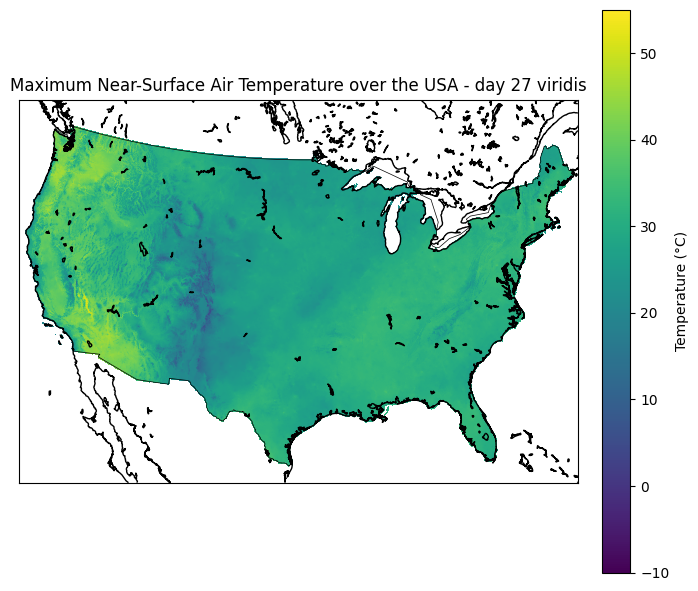

In [ ]:
# fig, axes = plt.subplots(1, 3, figsize=(21, 8))

day = 27
# plot_tmmx(day, axes[0])  # Plot in the first box
# plot_tmmn(day, axes[1])  # Plot in the second box
# plot_srad(day, axes[2])   # Plot in the third box

# plt.tight_layout()
# plt.show()

# fig, axes = plt.subplots(1, 1, figsize=(7, 8))
# plot_fm100(day, axes)   # Plot in the fifth box
# plt.tight_layout()
# plt.show()

fig, axes = plt.subplots(1, 1, figsize=(7, 8))
plot_tmmx(day, axes, 'viridis')   # Plot in the fifth box
plt.tight_layout()
plt.show()

# plt.tight_layout()

# plt.show()
# fig, axes = plt.subplots(1, 1, figsize=(7, 8))
# plot_bi(day, axes)   # Plot in the fifth box
# plt.tight_layout()
# plt.show()

# plt.show()
# fig, axes = plt.subplots(1, 1, figsize=(7, 8))
# plot_erc(day, axes)   # Plot in the fifth box
# plt.tight_layout()
# plt.show()


# Turn off the sixth subplot if not needed
# axes[1, 2].axis('off')

# plt.tight_layout()
# plt.show()
